## ICP04

Create a new notebook. Use the data from airbnb with a target of price_gte_150 to fit an SVM (with poly kernel) and Decision tree model using the randomsearch/gridsearch approach demonstrated in the in-class notebook 2b-param-searching.ipynb. Use precision as the scoring measure to optimize.

Create a discussion section at the end of your notebook. In this section, discuss your findings.

Srikar Pusuluri
U95310908

Importing Required Libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

np.random.seed(1)

In [2]:
# Load the Data
X_train = pd.read_csv('airbnb_train_X_price_gte_150.csv') 
y_train = pd.read_csv('airbnb_train_y_price_gte_150.csv') 
X_test = pd.read_csv('airbnb_test_X_price_gte_150.csv') 
y_test = pd.read_csv('airbnb_test_y_price_gte_150.csv')

SVM with Poly Kernl

In [3]:
# Modelling the data

performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

In [4]:
performance

,model,Accuracy,Precision,Recall,F1


In [7]:
svm_poly_model = SVC(kernel="poly",probability = True)
_ = svm_poly_model.fit(X_train, np.ravel(y_train))

In [8]:
model_preds = svm_poly_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"poly svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

In [9]:
performance

,model,Accuracy,Precision,Recall,F1
0,poly svm,0.851921,0.831261,0.881356,0.855576


Decision Tree

In [10]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(30,36),  
    'min_samples_leaf': np.arange(6,12),
    'min_impurity_decrease': np.arange(0.0048, 0.0054, 0.0001),
    'max_leaf_nodes': np.arange(162,168), 
    'max_depth': np.arange(15,21), 
    'criterion': ['entropy'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 9072 candidates, totalling 45360 fits
The best precision score is 0.8470330066484271
... with parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 162, 'min_impurity_decrease': 0.0048, 'min_samples_leaf': 10, 'min_samples_split': 30}


In [14]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")
performance = pd.concat([performance, pd.DataFrame({'model':"Decision Tree with Grid Search", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

Accuracy=0.8462980 Precision=0.8379374 Recall=0.8568738 F1=0.8472998


In [15]:
performance

,model,Accuracy,Precision,Recall,F1
0,poly svm,0.851921,0.831261,0.881356,0.855576
0,Decision Tree with Grid Search,0.846298,0.837937,0.856874,0.847300


In [16]:
# Diagram of Decision Trees

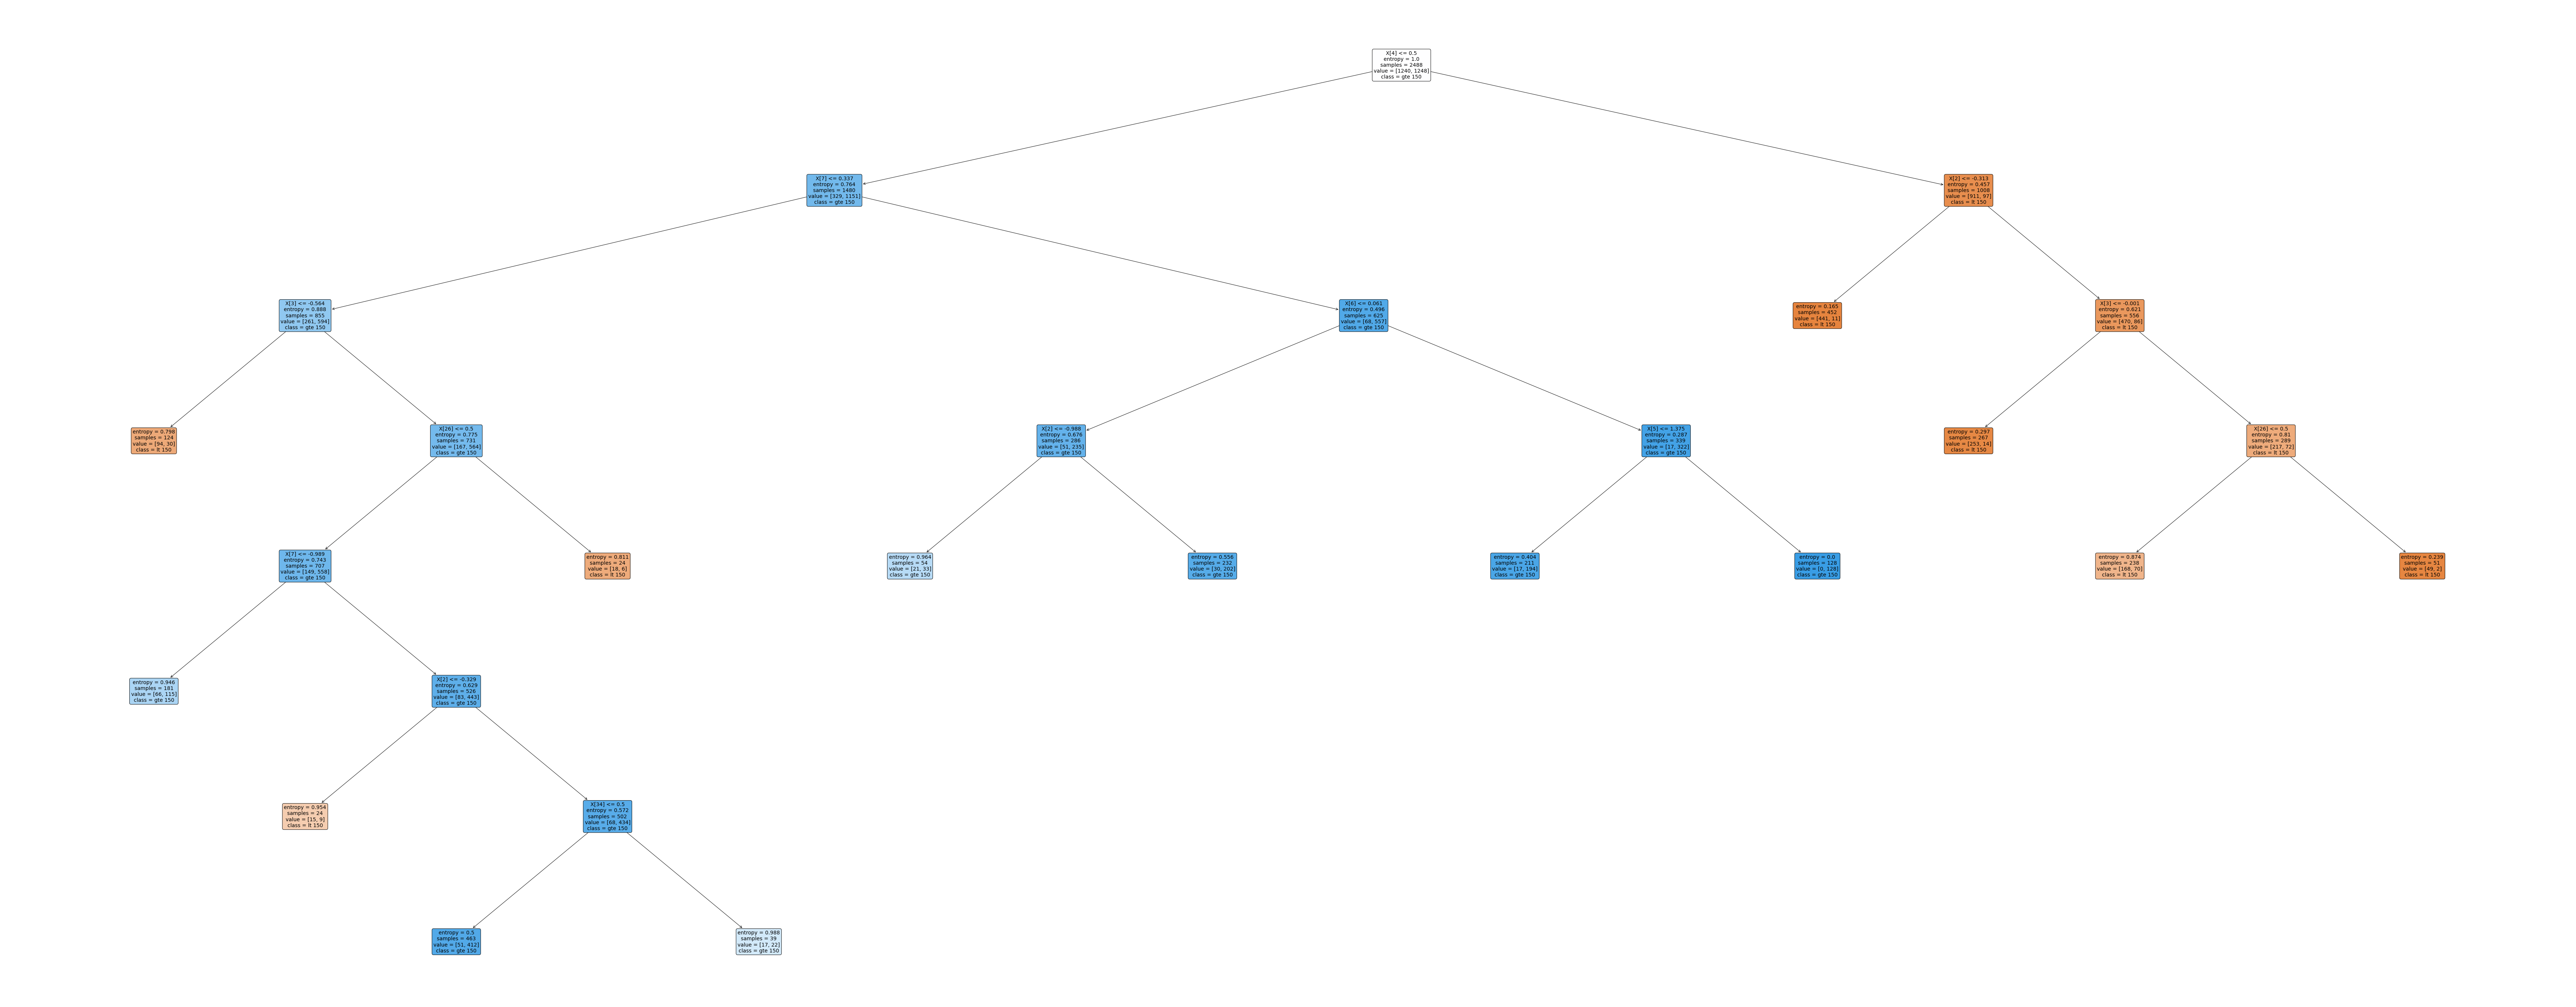

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Conclusion:

Based on the above analysis, when using Precision as the scoring measure, there is a little difference between precision using Poly SVM, which is 0.831261, and precision using Decision tree with Gridsearch, which is 0.837937.